In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_parquet('/Users/apple/Downloads/0000 (1).parquet')

In [3]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
df.shape

(114000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
df.dropna(subset=['artists', 'album_name', 'track_name'], inplace=True)

In [8]:
df = df.drop_duplicates(subset=['track_id'], keep='first')

In [9]:
df['duration_min'] = df['duration_ms'] / 60000
df.drop('duration_ms', axis=1, inplace=True)

/var/folders/bh/m62jl6f93k555v8_jbrgqy3c0000gn/T/ipykernel_71939/79001109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = df['duration_ms'] / 60000
/var/folders/bh/m62jl6f93k555v8_jbrgqy3c0000gn/T/ipykernel_71939/79001109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('duration_ms', axis=1, inplace=True)


In [10]:
import pandas as pd

# Assuming df is your existing DataFrame with columns such as 'track_id', 'artists', 'popularity', etc.

# Step 1: Split the artists for each track
df['artist_list'] = df['artists'].str.split(';')
df_exploded = df.explode('artist_list')  # Split each artist into its own row

# Step 2: Calculate the average popularity for each artist
artist_popularity = df_exploded.groupby('artist_list')['popularity'].mean().reset_index()
artist_popularity.columns = ['artist', 'avg_artist_popularity']

# Step 3: Merge the average artist popularity back to each track in the exploded DataFrame
df_exploded = df_exploded.merge(artist_popularity, left_on='artist_list', right_on='artist', how='left')

# Step 4: Calculate the average popularity of all artists on each track
track_avg_popularity = df_exploded.groupby('track_id')['avg_artist_popularity'].mean().reset_index()
track_avg_popularity.columns = ['track_id', 'track_avg_artist_popularity']

# Step 5: Merge the new feature back to the original DataFrame
df = pd.merge(df, track_avg_popularity, on='track_id', how='left')

# Final DataFrame with the new track_avg_artist_popularity feature added
print(df.head())  # Display the first few rows to check the result


/var/folders/bh/m62jl6f93k555v8_jbrgqy3c0000gn/T/ipykernel_71939/748105585.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['artist_list'] = df['artists'].str.split(';')


   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  explicit  danceability  energy  \
0                      Comedy          73     False         0.676  0.4610   
1            Ghost - Acoustic          55     False         0.420  0.1660   
2              To Begin Again          57

In [11]:
df.drop(['Unnamed: 0', 'track_id', 'album_name','track_name','artists', 'artist_list', ], axis=1, inplace=True)

In [12]:
df

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,track_avg_artist_popularity
0,73,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,3.844433,51.571429
1,55,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,2.493500,41.222222
2,57,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,3.513767,58.097222
3,71,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,3.365550,52.523810
4,82,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3.314217,42.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,21,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,6.416650,23.500000
89736,22,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,6.416667,23.500000
89737,22,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,4.524433,26.312500
89738,41,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,4.731550,35.057143


In [13]:
df['explicit'].nunique()

2

In [14]:
df['track_genre'].nunique()

113

In [15]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,track_avg_artist_popularity
count,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000
mean,33.198808,0.562166,0.634458,5.283530,-8.498994,0.636973,0.087442,0.328285,0.173415,0.216971,0.469474,122.058134,3.897426,3.819073,33.256234
std,20.580640,0.176692,0.256606,3.559912,5.221518,0.480875,0.113278,0.338321,0.323849,0.194885,0.262864,30.117651,0.453437,1.882430,16.396519
min,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143100,0.000000
25%,19.000000,0.450000,0.457000,2.000000,-10.322250,0.000000,0.036000,0.017100,0.000000,0.098200,0.249000,99.262750,4.000000,2.884000,21.666667
50%,33.000000,0.576000,0.676000,5.000000,-7.185000,1.000000,0.048900,0.188000,0.000058,0.132000,0.457000,122.013000,4.000000,3.554925,33.000000
75%,49.000000,0.692000,0.853000,8.000000,-5.108000,1.000000,0.085900,0.625000,0.097625,0.279000,0.682000,140.077000,4.000000,4.404883,45.250000
max,100.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,87.288250,99.000000


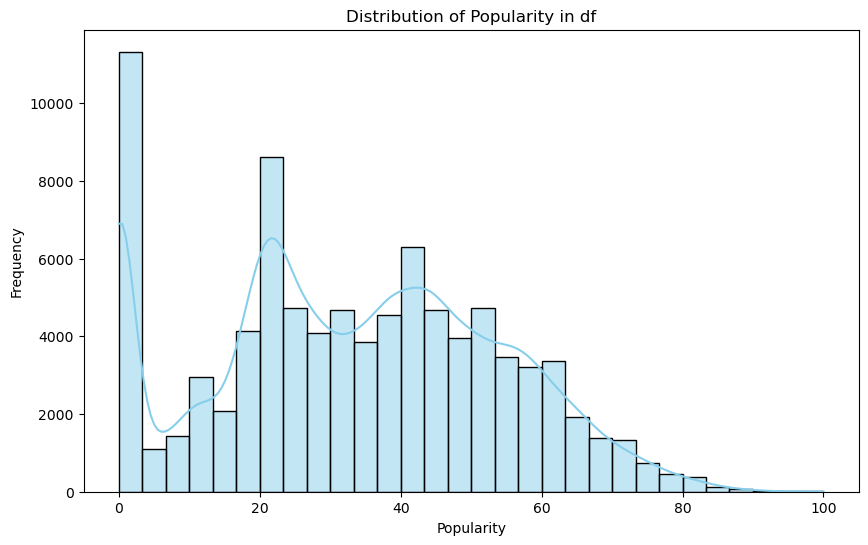

In [16]:
# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], kde=True, color='skyblue', bins = 30)
plt.title("Distribution of Popularity in df")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

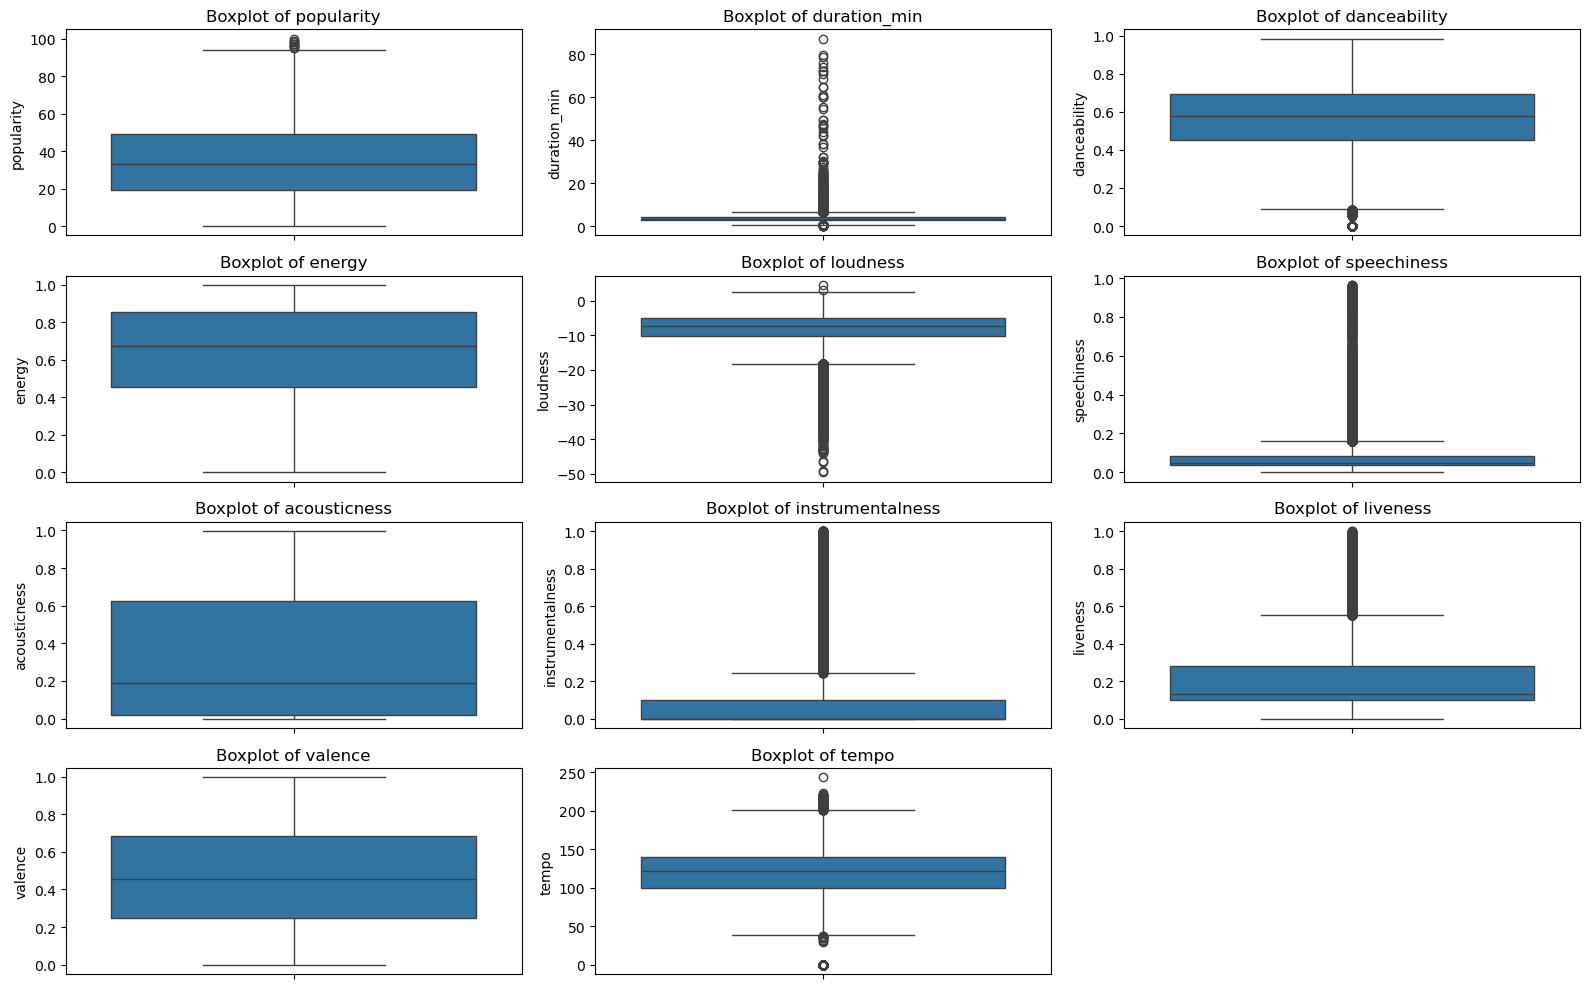

In [17]:
# Visualize numeric columns for outliers
numeric_columns = ['popularity', 'duration_min', 'danceability', 'energy', 'loudness', 
                   'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

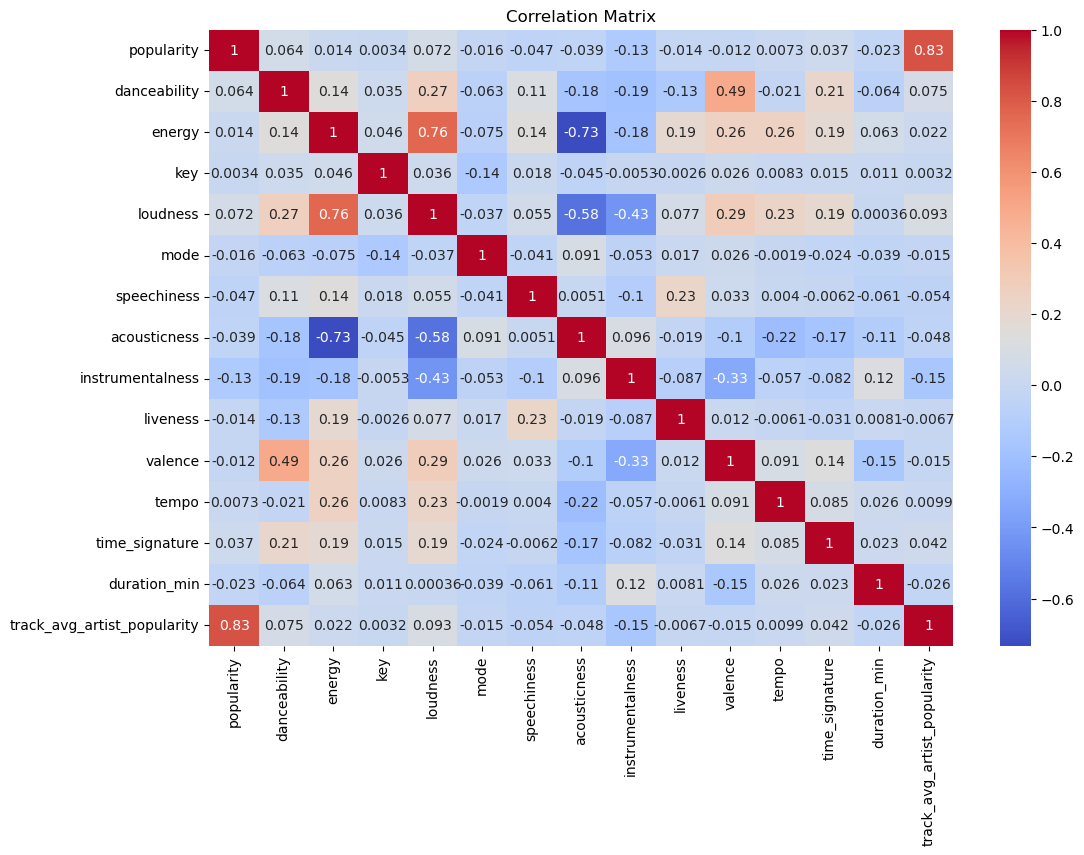

In [18]:
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include='number')

# Now calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
correlation_matrix = numeric_columns.corr()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

In [20]:
# Finding columns with any correlation less than -0.6
high_corr_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] < -0.4)]
high_corr_columns

['acousticness', 'instrumentalness']

In [21]:
# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Check for columns with a correlation less than -0.4
high_corr_columns = [column for column in corr_matrix.columns if any(corr_matrix[column] < -0.4)]
print(high_corr_columns)

['energy', 'loudness', 'acousticness', 'instrumentalness']


In [22]:
# Show the correlation values between the columns
corr_matrix.loc[['energy', 'loudness', 'acousticness', 'instrumentalness'], 
                ['energy', 'loudness', 'acousticness', 'instrumentalness']]

,energy,loudness,acousticness,instrumentalness
energy,1.000000,0.758774,-0.732569,-0.181038
loudness,0.758774,1.000000,-0.582664,-0.434719
acousticness,-0.732569,-0.582664,1.000000,0.096072
instrumentalness,-0.181038,-0.434719,0.096072,1.000000


In [23]:
# Drop the 'loudness' column
df = df.drop(columns=['loudness'])

# Create a combined feature for energy and acousticness
df['energy_acoustic_balance'] = df['energy'] + df['acousticness']

In [24]:
df = df.drop(columns=['acousticness'])

In [25]:
import pandas as pd

# Function to cap outliers
def cap_outliers(df, columns):
    df_copy = df.copy()  # Create a copy of the dataframe to avoid modifying the original
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers
        df_copy[col] = df_copy[col].apply(lambda x: min(max(x, lower_bound), upper_bound))
        
    return df_copy

columns_to_treat = ['popularity', 'duration_min', 'danceability', 'energy', 
                    'speechiness', 'instrumentalness', 
                    'liveness', 'valence', 'tempo', 'track_avg_artist_popularity', 
                    'energy_acoustic_balance']

# Assuming 'df' is your DataFrame containing the dataset
df = cap_outliers(df, columns_to_treat)

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Function to normalize the data
def normalize_data(df, columns):
    scaler = MinMaxScaler()
    
    # Fit and transform the data for specified columns
    df[columns] = scaler.fit_transform(df[columns])
    
    return df

# Applying normalization after outlier treatment
df = normalize_data(df, columns_to_treat)

In [27]:
# Define genre groups with 'acoustic' added
genre_groups = {
    'Rock': ['alt-rock', 'alternative', 'black-metal', 'death-metal', 'emo', 'goth', 'grindcore', 'grunge', 'hard-rock', 'hardcore', 'heavy-metal', 'indie', 'indie-pop', 'metal', 'metalcore', 'punk-rock', 'punk', 'rock', 'rock-n-roll', 'rockabilly'],
    'Pop': ['pop', 'pop-film', 'power-pop', 'synth-pop', 'indie-pop', 'k-pop', 'j-pop', 'mandopop', 'cantopop', 'british', 'j-idol'],
    'Electronic': ['edm', 'electro', 'electronic', 'deep-house', 'techno', 'house', 'detroit-techno', 'minimal-techno', 'progressive-house', 'trance', 'dubstep', 'chicago-house', 'club', 'dance', 'dancehall', 'drum-and-bass', 'dub', 'garage', 'hardstyle', 'idm', 'disco', 'breakbeat'],
    'Hip-Hop': ['hip-hop', 'rap', 'trap'],
    'Jazz & Blues': ['blues', 'jazz', 'bluegrass'],
    'Country & Folk': ['country', 'folk', 'honky-tonk', 'americana', 'bluegrass'],
    'Classical': ['classical', 'opera', 'piano'],
    'World Music': ['latin', 'latino', 'brazil', 'forro', 'samba', 'pagode', 'mpb', 'sertanejo', 'tango', 'turkish', 'world-music', 'afrobeat', 'reggae', 'reggaeton', 'iranian', 'indian', 'malay', 'swedish', 'french', 'german', 'spanish'],
    'Soul & RnB': ['soul', 'r-n-b', 'gospel'],
    'Children & Family': ['children', 'kids', 'disney'],
    'Relaxation & Ambient': ['ambient', 'chill', 'study', 'sleep', 'new-age', 'world-music', 'acoustic'],
    'Miscellaneous': ['comedy', 'anime', 'show-tunes', 'soundtrack', 'party', 'romance', 'holiday']
}

# Map genres to grouped categories and create a 'genre_group' column
df['genre_group'] = df['track_genre'].map(
    lambda x: next((group for group, genres in genre_groups.items() if x in genres), 'Other')
)

# Create a subset with all columns except 'track_genre', rename 'genre_group' to 'track_genre'
df = df.drop(columns=['track_genre']).rename(columns={'genre_group': 'track_genre'}).copy()

# Display the resulting subset to verify
print("Subset DataFrame shape:", df.shape)
print("Unique track genres (groups):", df['track_genre'].unique())

Subset DataFrame shape: (89740, 16)
Unique track genres (groups): ['Relaxation & Ambient' 'World Music' 'Rock' 'Miscellaneous'
 'Jazz & Blues' 'Electronic' 'Pop' 'Children & Family' 'Classical'
 'Country & Folk' 'Other' 'Soul & RnB' 'Hip-Hop']


In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Label encoding for the 'explicit' column (binary encoding)
df['explicit'] = LabelEncoder().fit_transform(df['explicit'])

In [29]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'genre' is your target column
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['track_genre'])


In [59]:
from sklearn.model_selection import train_test_split

# Features (excluding 'genre_encoded' which is the target)
X = df.drop(columns=['track_genre', 'genre_encoded'])

# Target (genre_encoded)
y = df['genre_encoded']

# Split data into training and testing (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Define models
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Initialize an empty dictionary to store the results
classification_results = {}

# Train and evaluate each model
for model_name, model in classification_models.items():
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results in dictionary
    classification_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Classification Report': class_report,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

# Convert the results into a DataFrame for easier comparison
classification_results_df = pd.DataFrame(classification_results).T

# Display the results
print(classification_results_df)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

                     Accuracy Precision    Recall  F1 Score  \
Logistic Regression  0.393024  0.363676  0.393024  0.346445   
Decision Tree        0.489005  0.489577  0.489005  0.489221   
Random Forest        0.626774   0.63545  0.626774   0.61918   
Gradient Boosting    0.548213  0.547881  0.548213  0.539715   
AdaBoost             0.369326  0.346073  0.369326  0.340563   
SVM                  0.377907  0.356736  0.377907  0.306278   
KNN                  0.422814  0.417349  0.422814  0.416112   

                                                 Classification Report  \
Logistic Regression  {'0': {'precision': 0.36666666666666664, 'reca...   
Decision Tree        {'0': {'precision': 0.44127332601536773, 'reca...   
Random Forest        {'0': {'precision': 0.7127976190476191, 'recal...   
Gradient Boosting    {'0': {'precision': 0.610632183908046, 'recall...   
AdaBoost             {'0': {'precision': 0.318562874251497, 'recall...   
SVM                  {'0': {'precision': 0.52808988

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],        # Number of trees
    'max_depth': [None, 10, 20, 30],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],   # Number of features to consider for the best split
    'bootstrap': [True, False]                   # Whether bootstrap samples are used when building trees
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model on the test data
y_pred_best = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
class_report_best = classification_report(y_test, y_pred_best, output_dict=True)
confusion_matrix_best = confusion_matrix(y_test, y_pred_best)

# Store results
best_model_results = {
    'Accuracy': accuracy_best,
    'Precision': precision_best,
    'Recall': recall_best,
    'F1 Score': f1_best,
    'Classification Report': class_report_best,
    'Confusion Matrix': confusion_matrix_best
}

# Convert results into DataFrame for comparison
best_model_results_df = pd.DataFrame([best_model_results])
print(best_model_results_df)


Fitting 3 folds for each of 864 candidates, totalling 2592 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   4.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estima

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
864 fits failed out of a total of 2592.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
632 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
   Accuracy  Precision    Recall  F1 Score  \
0  0.638548   0.644805  0.638548  0.632022   

                               Classification Report  \
0  {'0': {'precision': 0.7326440177252584, 'recal...   

                                    Confusion Matrix  
0  [[496, 15, 22, 78, 0, 3, 31, 29, 16, 50, 30, 0...  


In [33]:
df

,popularity,explicit,danceability,energy,key,mode,speechiness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,track_avg_artist_popularity,energy_acoustic_balance,track_genre,genre_encoded
0,0.776596,0,0.655902,0.4610,1,0,0.889580,0.000004,0.650672,0.718593,0.305504,4,0.532874,0.639646,0.079152,Relaxation & Ambient,9
1,0.585106,0,0.370824,0.1660,1,1,0.474650,0.000023,0.183570,0.268342,0.241629,4,0.310810,0.511283,0.617780,Relaxation & Ambient,9
2,0.606383,0,0.390869,0.3590,0,1,0.346501,0.000000,0.212650,0.120603,0.234542,4,0.478520,0.720586,0.147563,Relaxation & Ambient,9
3,0.755319,0,0.199332,0.0596,0,1,0.225816,0.000290,0.239913,0.143719,0.880199,3,0.454156,0.651458,0.504603,Relaxation & Ambient,9
4,0.872340,0,0.591314,0.4430,2,1,0.327216,0.000000,0.150672,0.167839,0.501710,4,0.445718,0.532300,0.457130,Relaxation & Ambient,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,0.223404,0,0.094655,0.2350,5,1,0.262519,1.000000,0.156852,0.034070,0.538743,5,0.955690,0.291473,0.423736,World Music,12
89736,0.234043,0,0.096882,0.1170,0,0,0.249456,1.000000,0.190840,0.035176,0.289100,4,0.955693,0.291473,0.636733,World Music,12
89737,0.234043,0,0.603563,0.3290,0,0,0.261275,0.000000,0.152490,0.746734,0.577841,4,0.644651,0.326357,0.713448,World Music,12
89738,0.436170,0,0.556793,0.5060,7,1,0.184759,0.000000,0.490731,0.415075,0.599782,4,0.678697,0.434817,0.434567,World Music,12


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'df' is your DataFrame
df = df.drop(columns=['track_genre'])  # Drop irrelevant columns

# Compute Cosine Similarity
similarity_matrix = cosine_similarity(df.drop(columns=['genre_encoded']))  # Exclude target column
similarity_df = pd.DataFrame(similarity_matrix, index=df.index, columns=df.index)

# Recommendation Function
def recommend(track_index, top_n=5):
    """
    Recommend top N similar tracks for a given track index.
    :param track_index: Index of the track to recommend for
    :param top_n: Number of recommendations to return
    :return: DataFrame with similar track indices and similarity scores
    """
    similar_tracks = similarity_df.loc[track_index].sort_values(ascending=False).iloc[1:top_n + 1]
    return pd.DataFrame({'Track Index': similar_tracks.index, 'Similarity Score': similar_tracks.values})

# Example: Recommend similar tracks for the first track
track_index = 0  # Index of the track to find recommendations for
recommendations = recommend(track_index=track_index, top_n=5)
print(recommendations)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
df = df.drop(columns=['track_genre'])
# Define chunk size
chunk_size = 1000

# Initialize an empty DataFrame for storing results
similarity_results = {}

# Compute similarity for each chunk
for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i+chunk_size]
    similarity_matrix = cosine_similarity(chunk, df)
    similarity_df = pd.DataFrame(similarity_matrix, index=chunk.index, columns=df.index)
    similarity_results.update(similarity_df.to_dict(orient='index'))

# Combine all results
final_similarity_df = pd.DataFrame.from_dict(similarity_results, orient='index', columns=df.index)


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
df = df.drop(columns=['track_genre'])
# Assuming 'df' is your DataFrame (with scaled features)
# Exclude the target column (if any), and columns you don't want to use for PCA

# Step 1: Apply PCA to reduce dimensions
pca = PCA(n_components=0.95)  # Keeps 95% of variance
df_reduced = pca.fit_transform(df)  # Apply PCA

# Step 2: Compute Cosine Similarity on the reduced data
similarity_matrix = cosine_similarity(df_reduced)  # Compute similarity

# Convert the similarity matrix to a DataFrame for easy interpretation
similarity_df = pd.DataFrame(similarity_matrix, index=df.index, columns=df.index)

# Example Recommendation Function
def recommend(track_index, top_n=5):
    """
    Recommend top N similar tracks for a given track index.
    :param track_index: Index of the track to recommend for
    :param top_n: Number of recommendations to return
    :return: DataFrame with similar track indices and similarity scores
    """
    similar_tracks = similarity_df.loc[track_index].sort_values(ascending=False).iloc[1:top_n + 1]
    return pd.DataFrame({'Track Index': similar_tracks.index, 'Similarity Score': similar_tracks.values})

# Example: Recommend similar tracks for the first track
track_index = 0  # Index of the track to find recommendations for
recommendations = recommend(track_index=track_index, top_n=5)
print(recommendations)


In [65]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from annoy import AnnoyIndex


# Subset the data to a smaller size (for testing purposes)
df_subsample = df.sample(n=10000, random_state=42)  # Take a random subset of 10,000 rows

# Drop 'track_genre' and any irrelevant columns
df_subsample = df_subsample.drop(columns=['track_genre'])  # Drop irrelevant columns if needed

# Convert the DataFrame to a sparse matrix (compressed sparse row format) to save memory
df_sparse = csr_matrix(df_subsample)

# Compute Cosine Similarity on the sparse matrix
similarity_matrix_sparse = cosine_similarity(df_sparse)

# Convert the similarity matrix to a DataFrame for easier viewing
similarity_df = pd.DataFrame(similarity_matrix_sparse, index=df_subsample.index, columns=df_subsample.index)

# Function to recommend similar tracks based on cosine similarity
def recommend(track_index, top_n=5):
    """
    Recommend top N similar tracks for a given track index.
    :param track_index: Index of the track to recommend for
    :param top_n: Number of recommendations to return
    :return: DataFrame with similar track indices and similarity scores
    """
    similar_tracks = similarity_df.loc[track_index].sort_values(ascending=False).iloc[1:top_n + 1]
    return pd.DataFrame({'Track Index': similar_tracks.index, 'Similarity Score': similar_tracks.values})

# Example: Recommend similar tracks for the first track in the subsampled data
track_index = df_subsample.index[0]  # Index of the first track
recommendations = recommend(track_index=track_index, top_n=5)
print("Recommendations using Cosine Similarity:")
print(recommendations)

# Optional: Using Annoy for approximate nearest neighbors (faster with less memory usage)
def recommend_with_annoy(track_index, top_n=5):
    """
    Recommend similar tracks using Annoy for approximate nearest neighbors.
    :param track_index: Index of the track to recommend for
    :param top_n: Number of recommendations to return
    :return: List of recommended track indices
    """
    n_features = df_subsample.shape[1]  # Automatically set the correct number of features

    annoy_index = AnnoyIndex(n_features, 'angular')  # 'angular' corresponds to cosine similarity

    # Build the Annoy index with the data (using the sparse matrix to reduce memory usage)
    for i in range(df_subsample.shape[0]):
        annoy_index.add_item(i, df_subsample.iloc[i].values)

    annoy_index.build(10)  # Build with 10 trees

    # Get the most similar items for the given track
    similar_tracks = annoy_index.get_nns_by_item(track_index, top_n + 1)  # +1 because it includes the query item
    similar_tracks = similar_tracks[1:]  # Remove the query track itself
    return similar_tracks

# Example: Recommend similar tracks for the first track using Annoy
annoy_recommendations = recommend_with_annoy(track_index=track_index, top_n=5)
print("\nRecommendations using Annoy (Approximate Neighbors):")
print(annoy_recommendations)



Recommendations using Cosine Similarity:
   Track Index  Similarity Score
0        57625          0.999334
1        71929          0.999286
2        58248          0.998787
3        76895          0.998644
4        80992          0.998559


IndexError: Item index larger than the largest item index

In [69]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from annoy import AnnoyIndex



# Subset the data to a smaller size (for testing purposes)
df_subsample = df.sample(n=10000, random_state=42)  # Take a random subset of 10,000 rows

# Drop 'track_genre' and any irrelevant columns
df_subsample = df_subsample.drop(columns=['track_genre'])  # Drop irrelevant columns if needed

# Convert the DataFrame to a sparse matrix (compressed sparse row format) to save memory
df_sparse = csr_matrix(df_subsample)

# Compute Cosine Similarity on the sparse matrix
similarity_matrix_sparse = cosine_similarity(df_sparse)

# Convert the similarity matrix to a DataFrame for easier viewing
similarity_df = pd.DataFrame(similarity_matrix_sparse, index=df_subsample.index, columns=df_subsample.index)

# Function to recommend similar tracks based on cosine similarity
def recommend(track_index, top_n=5):
    """
    Recommend top N similar tracks for a given track index.
    :param track_index: Index of the track to recommend for
    :param top_n: Number of recommendations to return
    :return: DataFrame with similar track indices and similarity scores
    """
    similar_tracks = similarity_df.loc[track_index].sort_values(ascending=False).iloc[1:top_n + 1]
    return pd.DataFrame({'Track Index': similar_tracks.index, 'Similarity Score': similar_tracks.values})

# Example: Recommend similar tracks for the first track in the subsampled data
track_index = df_subsample.index[0]  # Ensure track_index is from df_subsample
recommendations = recommend(track_index=track_index, top_n=5)
print("Recommendations using Cosine Similarity:")
print(recommendations)

# Optional: Using Annoy for approximate nearest neighbors (faster with less memory usage)
def recommend_with_annoy(track_index, top_n=5):
    """
    Recommend similar tracks using Annoy for approximate nearest neighbors.
    :param track_index: Index of the track to recommend for
    :param top_n: Number of recommendations to return
    :return: List of recommended track indices
    """
    n_features = df_subsample.shape[1]  # Automatically set the correct number of features

    annoy_index = AnnoyIndex(n_features, 'angular')  # 'angular' corresponds to cosine similarity

    # Build the Annoy index with the data (using the sparse matrix to reduce memory usage)
    for i in range(df_subsample.shape[0]):
        annoy_index.add_item(i, df_subsample.iloc[i].values)

    annoy_index.build(10)  # Build with 10 trees

    # Ensure track_index is within bounds of df_subsample
    if track_index not in df_subsample.index:
        print(f"Error: track_index {track_index} not found in df_subsample")
        return []

    # Get the most similar items for the given track
    similar_tracks = annoy_index.get_nns_by_item(df_subsample.index.get_loc(track_index), top_n + 1)  # +1 because it includes the query item
    similar_tracks = similar_tracks[1:]  # Remove the query track itself
    return similar_tracks

# Example: Recommend similar tracks for the first track using Annoy
annoy_recommendations = recommend_with_annoy(track_index=track_index, top_n=5)
print("\nRecommendations using Annoy (Approximate Neighbors):")
print(annoy_recommendations)



Recommendations using Cosine Similarity:
   Track Index  Similarity Score
0        57625          0.999334
1        71929          0.999286
2        58248          0.998787
3        76895          0.998644
4        80992          0.998559

Recommendations using Annoy (Approximate Neighbors):
[966, 5070, 1367, 429, 4863]


In [71]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Assuming df is your DataFrame with track features and track names
# For this example, we use a subset of columns (features) and track names
track_names = df['track_name'].tolist()  # Assuming you have a 'track_name' column

# Compute Cosine Similarity
df_features = df.drop(columns=['track_name', 'track_genre'])  # Remove non-feature columns
similarity_matrix = cosine_similarity(df_features)
similarity_df = pd.DataFrame(similarity_matrix, index=track_names, columns=track_names)

# Recommendation Function
def recommend(track_name, top_n=5):
    """
    Recommend top N similar tracks for a given track name.
    :param track_name: The track name to recommend similar tracks for
    :param top_n: Number of recommendations to return
    :return: DataFrame with similar track names and similarity scores
    """
    similar_tracks = similarity_df[track_name].sort_values(ascending=False).iloc[1:top_n + 1]  # Exclude self
    return pd.DataFrame({'Track Name': similar_tracks.index, 'Similarity Score': similar_tracks.values})

# User Input to Select a Track
print("Available Tracks:")
for idx, track in enumerate(track_names[:10]):  # Show a few sample tracks (adjust as needed)
    print(f"{idx}: {track}")

track_index = int(input("\nEnter the track index number to get recommendations: "))
selected_track = track_names[track_index]

# Get Recommendations
recommendations = recommend(track_name=selected_track, top_n=5)
print(f"\nRecommendations for '{selected_track}':")
print(recommendations)


KeyError: 'track_name'